In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(suppress = True)

In [2]:
col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
             'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', 
                 header = None, names = col_names)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [4]:
df.shape

(303, 14)

In [5]:
df.num.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [6]:
df['num'] = np.where(df.num == 0, 0, 1)

In [7]:
df.num.unique()

array([0, 1])

In [8]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [9]:
df.thal.unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [10]:
df.replace('?', np.nan, inplace = True)

In [11]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', nan], dtype=object)

In [12]:
df.ca = df.ca.astype(float)

In [13]:
df.thal = df.thal.astype(float)

In [14]:
df['ca'].unique()

array([ 0.,  3.,  2.,  1., nan])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int32  
dtypes: float64(13), int32(1)
memory usage: 32.1 KB


In [16]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [17]:
X = df.drop('num', axis = 1)
y = df.num

In [18]:
import sklearn
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 20)

## Imputing NaN



In [20]:
from sklearn.impute import SimpleImputer

In [21]:
imputer = SimpleImputer(strategy = 'most_frequent')
imputer.fit(X_train)

SimpleImputer(strategy='most_frequent')

In [22]:
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [23]:
np.isnan(X_train).sum()

0

In [24]:
np.isnan(X_test).sum()

0

In [25]:
X_train

array([[45.,  0.,  4., ...,  2.,  0.,  3.],
       [63.,  1.,  1., ...,  3.,  0.,  6.],
       [42.,  1.,  4., ...,  2.,  0.,  6.],
       ...,
       [64.,  0.,  4., ...,  2.,  2.,  3.],
       [53.,  1.,  4., ...,  2.,  2.,  7.],
       [66.,  1.,  4., ...,  1.,  0.,  6.]])

## Decision Trees

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [27]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1])

In [29]:
metrics.accuracy_score(y_test, y_pred)

0.7868852459016393

In [30]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81        33
           1       0.78      0.75      0.76        28

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



### Apply cross validation using default tree

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [32]:
cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 0)
cv

StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

In [33]:
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, X = X_train, y = y_train, scoring = 'accuracy', cv = cv, n_jobs = -1)
print('CV accuracy scores: %s' % scores)

CV accuracy scores: [0.92       0.76       0.66666667 0.70833333 0.95833333 0.66666667
 0.70833333 0.875      0.83333333 0.83333333]


In [34]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.793 +/- 0.100


### Apply cross-validation to find an optimum parameter value

In [35]:
X_train.shape

(242, 13)

In [36]:
min_samples_split = [5, 10, 20, 25, 30, 40, 50]
scores_params = []

for m in min_samples_split:
    dt = DecisionTreeClassifier(min_samples_split = m)
    scores = cross_val_score(dt, X = X_train, y = y_train, scoring = 'accuracy', cv = cv)
    scores_params.append(scores.mean())

scores_params

[0.7849999999999999,
 0.8098333333333333,
 0.8303333333333335,
 0.8261666666666667,
 0.8220000000000001,
 0.7274999999999999,
 0.7191666666666666]

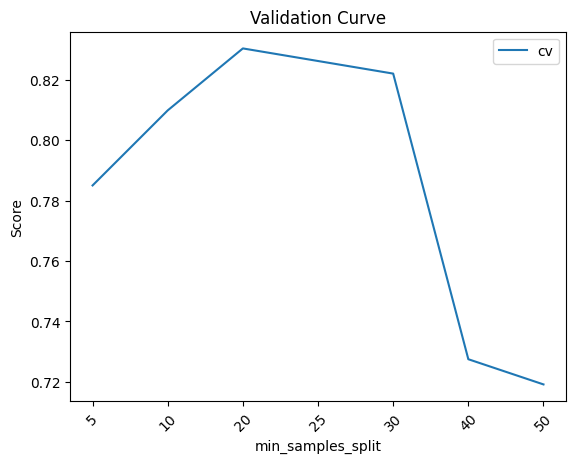

In [37]:
plt.plot(scores_params, label = 'cv')
plt.xticks(np.arange(len(min_samples_split)), min_samples_split, rotation = 45)
plt.xlabel('min_samples_split')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.legend()
plt.show()

### Grid Search

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [39]:
params = dict(
    min_samples_split = [5, 10, 20, 30, 40, 50],
    max_depth = [1, 2, 3, None],
)
params

{'min_samples_split': [5, 10, 20, 30, 40, 50], 'max_depth': [1, 2, 3, None]}

In [40]:
np.unique(y)

array([0, 1])

In [41]:
dt = DecisionTreeClassifier()
gs = GridSearchCV(estimator = dt, param_grid = params, scoring = 'f1', cv = cv, n_jobs = -1, )
gs

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, None],
                         'min_samples_split': [5, 10, 20, 30, 40, 50]},
             scoring='f1')

In [42]:
gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, None],
                         'min_samples_split': [5, 10, 20, 30, 40, 50]},
             scoring='f1')

In [43]:
gs.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_split=5)

In [44]:
gs.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [45]:
gs.best_params_

{'max_depth': 3, 'min_samples_split': 5}

In [46]:
best_estimator = gs.best_estimator_
best_estimator.get_depth()

3

In [47]:
pred = best_estimator.predict(X_test)

In [48]:
metrics.accuracy_score(y_test, pred)

0.8360655737704918

In [49]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        33
           1       0.91      0.71      0.80        28

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61



In [50]:
metrics.confusion_matrix(y_test, pred)

array([[31,  2],
       [ 8, 20]], dtype=int64)

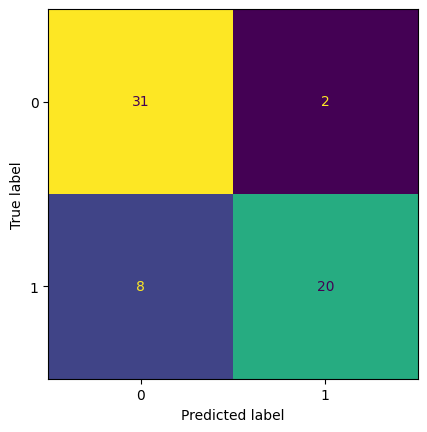

In [51]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred, colorbar = False);

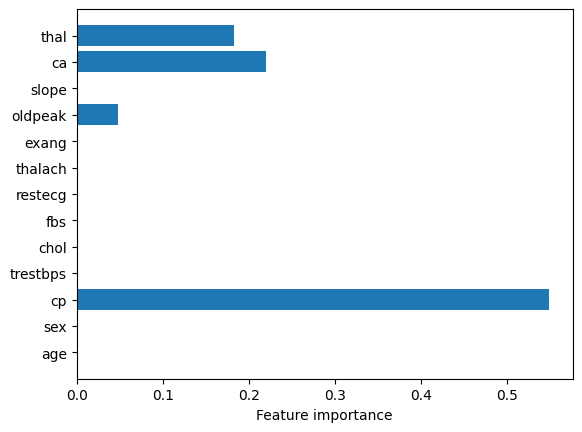

In [52]:
def plot_feature_importances(model, df):
    n_features = df.shape[1]
    df_colnames = df.columns
    plt.barh(np.arange(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), df_colnames)
    plt.xlabel("Feature importance")
    plt.ylim(-1, n_features)

plot_feature_importances(best_estimator, df = X)

### Learning curve using sklearn

In [53]:
from sklearn.model_selection import learning_curve, validation_curve

In [54]:
dt = DecisionTreeClassifier()

In [55]:
train_sizes, train_scores, test_scores = learning_curve(estimator = best_estimator,
                                            X = X_train,
                                            y = y_train,
                                            train_sizes = np.linspace(0.02, 1.0, 20),
                                            cv = cv,
                                            n_jobs = -1)

In [56]:
np.linspace(0.02, 1.0, 20)

array([0.02      , 0.07157895, 0.12315789, 0.17473684, 0.22631579,
       0.27789474, 0.32947368, 0.38105263, 0.43263158, 0.48421053,
       0.53578947, 0.58736842, 0.63894737, 0.69052632, 0.74210526,
       0.79368421, 0.84526316, 0.89684211, 0.94842105, 1.        ])

In [57]:
X_train.shape[0]

242

In [58]:
X_train.shape[0] * 0.02 * 0.9

4.356

In [59]:
X_train.shape[0] * 1 * 0.9

217.8

In [60]:
train_sizes

array([  4,  15,  26,  37,  49,  60,  71,  82,  93, 105, 116, 127, 138,
       149, 161, 172, 183, 194, 205, 217])

In [61]:
train_scores

array([[0.75      , 0.5       , 0.5       , 0.5       , 0.75      ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.93333333, 1.        , 1.        , 1.        ],
       [0.96153846, 0.96153846, 0.96153846, 0.92307692, 0.92307692,
        0.92307692, 0.96153846, 0.92307692, 0.92307692, 0.92307692],
       [0.94594595, 0.94594595, 0.91891892, 0.94594595, 0.91891892,
        0.91891892, 0.91891892, 0.94594595, 0.91891892, 0.91891892],
       [0.91836735, 0.95918367, 0.95918367, 0.93877551, 0.95918367,
        0.93877551, 0.91836735, 0.95918367, 0.93877551, 0.95918367],
       [0.86666667, 0.95      , 0.95      , 0.91666667, 0.95      ,
        0.9       , 0.91666667, 0.91666667, 0.91666667, 0.93333333],
       [0.87323944, 0.90140845, 0.85915493, 0.88732394, 0.91549296,
        0.90140845, 0.91549296, 0.90140845, 0.87323944, 0.90140845],
       [0.90243902, 0.8902439 , 0.8902439

In [62]:
test_scores[0:2]

array([[0.44      , 0.52      , 0.54166667, 0.54166667, 0.45833333,
        0.54166667, 0.54166667, 0.54166667, 0.54166667, 0.54166667],
       [0.56      , 0.64      , 0.70833333, 0.70833333, 0.79166667,
        0.66666667, 0.75      , 0.75      , 0.79166667, 0.75      ]])

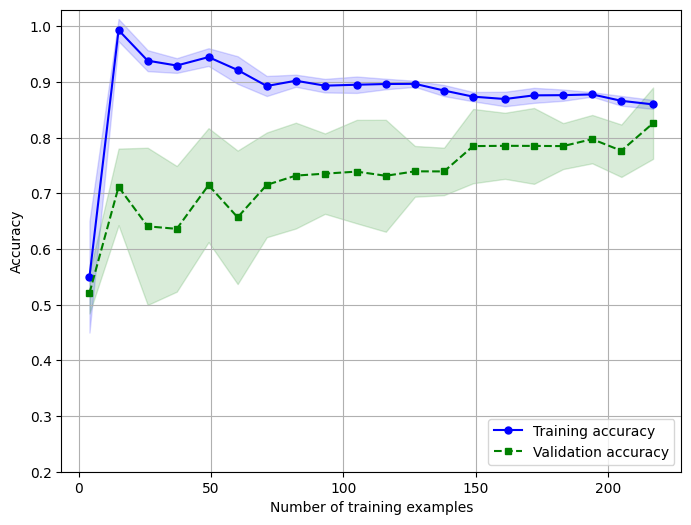

In [63]:
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

plt.figure(figsize = [8, 6])
plt.plot(train_sizes, train_mean,
    color = 'blue', marker = 'o',
    markersize = 5, label = 'Training accuracy')
plt.fill_between(train_sizes,
    train_mean + train_std,
    train_mean - train_std,
    alpha = 0.15, color = 'blue')
plt.plot(train_sizes, test_mean,
    color = 'green', linestyle = '--',
    marker = 's', markersize = 5,
    label = 'Validation accuracy')
plt.fill_between(train_sizes,
    test_mean + test_std,
    test_mean - test_std,
    alpha = 0.15, color = 'green')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.ylim([0.20, 1.03])
plt.show()

### Validation curve using sklearn

In [64]:
dt = DecisionTreeClassifier()

In [65]:
param_range = (np.linspace(X_train.shape[0] / 50, X_train.shape[0] / 3, 20)).astype(int)
param_range

array([ 4,  8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68,
       72, 76, 80])

In [66]:
train_scores, test_scores = validation_curve(
    estimator = dt,
    X = X_train,
    y = y_train,
    param_name = 'min_samples_split',
    param_range = param_range,
    cv = 10)

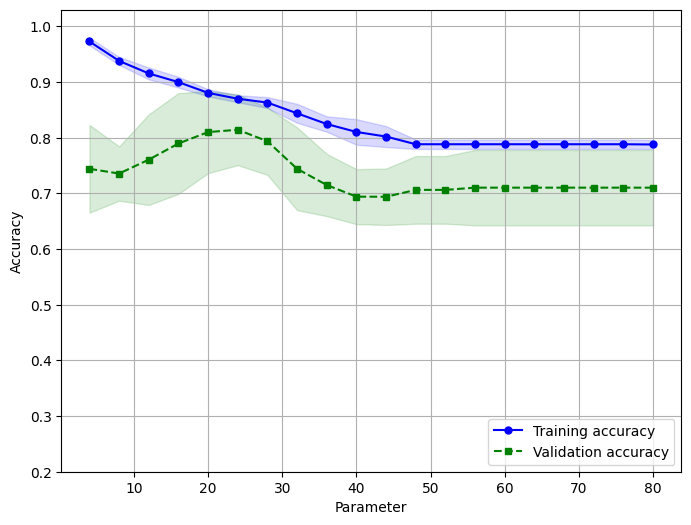

In [67]:
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

plt.figure(figsize = [8, 6])
plt.plot(param_range, train_mean,
    color = 'blue', marker = 'o',
    markersize = 5, label = 'Training accuracy')
plt.fill_between(param_range,
    train_mean + train_std,
    train_mean - train_std,
    alpha = 0.15, color = 'blue')
plt.plot(param_range, test_mean,
    color = 'green', linestyle = '--',
    marker = 's', markersize = 5,
    label = 'Validation accuracy')
plt.fill_between(param_range,
    test_mean + test_std,
    test_mean - test_std,
    alpha = 0.15, color = 'green')
plt.grid()
plt.xlabel('Parameter')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.ylim([0.20, 1.03])
plt.show()